# Aim: To Perform K-means and Agglomerative Clustering in Python.

link: https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/penguins.csv")

In [ ]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
print(df.isnull().sum())

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64


In [ ]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [ ]:
df.shape

(344, 5)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(335, 5)

In [ ]:
df = df[df['sex'] != '.']

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(334, 5)

In [ ]:
print(df.isnull().sum())  # Should show 0 missing values

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [ ]:
df=df.drop([9, 14])

In [ ]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])

In [ ]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


In [ ]:
df['sex'].unique()

array([1, 0])

In [ ]:
df.to_csv('cleaned_penguins.csv', index=False)

In [ ]:
df_numeric = df.select_dtypes(include=['number'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

### 1. K-Means

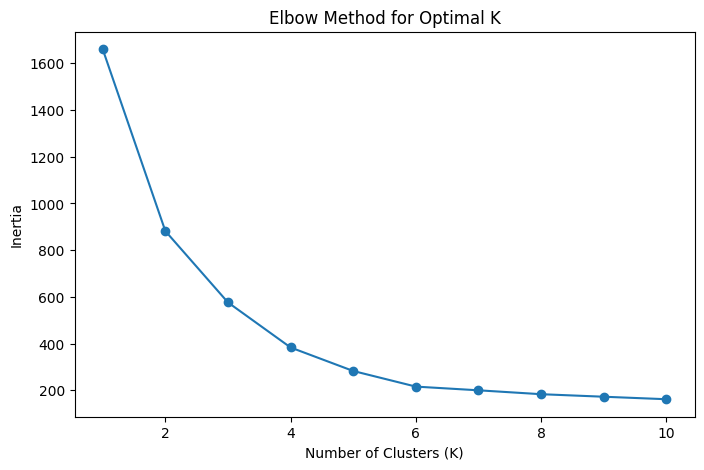

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Try different values of K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
# Set the chosen number of clusters
optimal_k = 4  # Replace with the best K from the elbow method

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# View cluster assignments
print(df[['Cluster']].value_counts())

Cluster
2          107
0          106
1           61
3           58
Name: count, dtype: int64


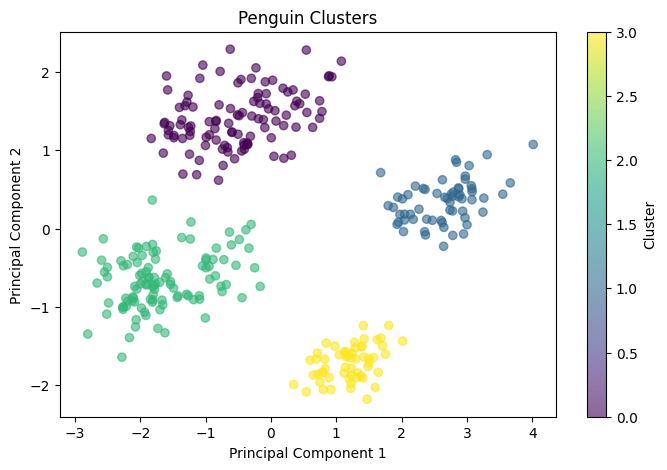

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2D
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Penguin Clusters')
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
# Analyze cluster properties
cluster_means = df.groupby('Cluster').mean()
cluster_means

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
Cluster,,,,,
0,43.878302,19.111321,194.764151,4006.603774,1.0
1,49.473770,15.718033,221.540984,5484.836066,1.0
2,40.217757,17.611215,189.046729,3419.158879,0.0
3,45.563793,14.237931,212.706897,4679.741379,0.0


In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_scaled, df['Cluster'])
print(f"Silhouette Score: {score}")

Silhouette Score: 0.5085922485155359


In [ ]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f"K={k}, Silhouette Score: {score}")


K=2, Silhouette Score: 0.4444090332019913
K=3, Silhouette Score: 0.45129141690388286
K=4, Silhouette Score: 0.5085922485155359
K=5, Silhouette Score: 0.5201330126562287
K=6, Silhouette Score: 0.5266703672733857
K=7, Silhouette Score: 0.4705237394431879
K=8, Silhouette Score: 0.4229130386541488
K=9, Silhouette Score: 0.3530509375326799


The Silhouette Score is a metric that tells you how well-separated and well-clustered your data points are after clustering.

Based on the Silhouette Scores, the clustering quality peaks at K=6 with a score of 0.5267, indicating this is likely the optimal number of clusters for your data.

In [ ]:
# Set the chosen number of clusters
optimal_k = 6

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# View cluster assignments
print(df[['Cluster']].value_counts())

Cluster
4          78
3          69
1          61
2          58
5          37
0          29
Name: count, dtype: int64


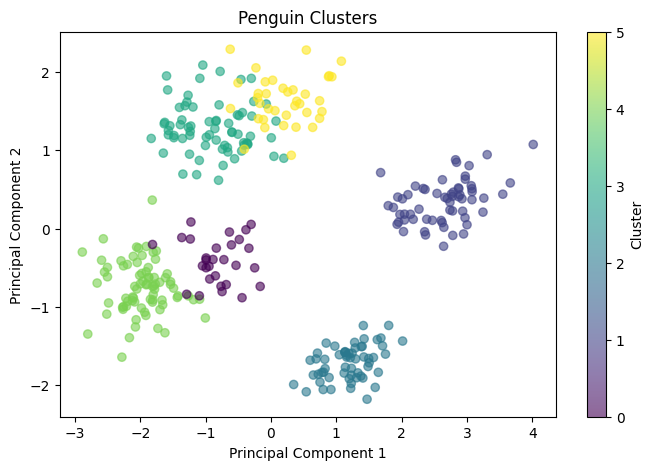

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2D
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Penguin Clusters')
plt.colorbar(label="Cluster")
plt.show()

## 2.Agglomerative Clustering

In [ ]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Cluster
0,39.1,18.7,181.0,3750.0,1,3
1,39.5,17.4,186.0,3800.0,0,4
2,40.3,18.0,195.0,3250.0,0,4
4,36.7,19.3,193.0,3450.0,0,4
5,39.3,20.6,190.0,3650.0,1,3


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
# Performing Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglo_clusters = agg_clustering.fit_predict(df_scaled)

# Add cluster labels to dataset
df["Agglomerative_Cluster"] = agglo_clusters

In [ ]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,Cluster,Agglomerative_Cluster
0,39.1,18.7,181.0,3750.0,1,3,0
1,39.5,17.4,186.0,3800.0,0,4,2
2,40.3,18.0,195.0,3250.0,0,4,2
4,36.7,19.3,193.0,3450.0,0,4,2
5,39.3,20.6,190.0,3650.0,1,3,0


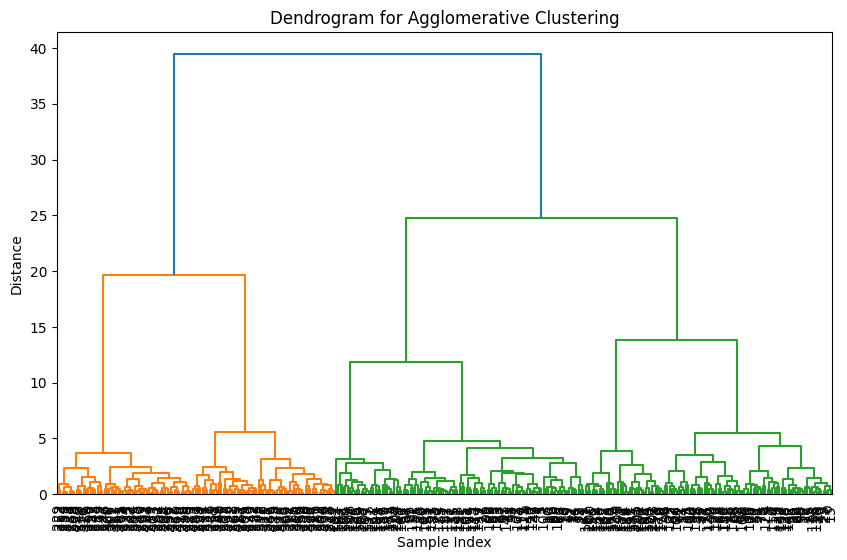

In [ ]:
# Plot Dendrogram
plt.figure(figsize=(10, 6))
linked = linkage(df_scaled, method='ward')
dendrogram(linked, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

**CONCLUSION**

1. The dendrogram shows clear hierarchical structure in the data.

2. Three clusters is a good starting point based on the spacing and distance.

3. The dataset likely has distinct subgroups, and Agglomerative Clustering has captured this well.

